# 🌸 Iris Analysis – Exploratory Data Analysis (EDA)

## 1. Introduction
- **Goal:** Explore the famous Iris dataset to understand feature distributions and how they differ across species.  
- **Dataset:** 150 samples of Iris flowers, with 4 numerical features: sepal length, sepal width, petal length, petal width. Target variable: species (setosa, versicolor, virginica).
- **Why It Matters:** A classic dataset to demonstrate classification and visualization techniques.

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Loading & Cleaning
### 2.1 Load Dataset
- Load `iris.csv` from Iris dataset.  
- Inspect shape, column names, and first rows.  

In [16]:
# Load the dataset
iris_df = pd.read_csv('../iris/Iris.csv')

In [17]:
print('--------------------Iris DataFrame--------------------\n')
print(iris_df.head())
print('\n--------------------Dataset Structure (rows, columns)--------------------\n')
print(iris_df.shape)
print('\n--------------------Statistical Summary--------------------\n')
print(iris_df.describe().T)
print('\n--------------------Column Names--------------------\n')
print(iris_df.columns.to_list())

--------------------Iris DataFrame--------------------

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

--------------------Dataset Structure (rows, columns)--------------------

(150, 6)

--------------------Statistical Summary--------------------

               count       mean        std  min    25%    50%     75%    max
Id             150.0  75.500000  43.445368  1.0  38.25  75.50  112.75  150.0
SepalLengthCm  150.0   5.843333   0.828066  4.3   5.10   5.80    6.40    7.9
SepalWidthCm   150.0   3.054000   0.433594  2.0   2.80   3.00    3.30    4.4
PetalLengthCm  150.0   3.75

### 2.2 Handle Missing Values
- Check missing values with `.isnull().sum()`.

In [18]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 2.3 Feature Engineering
- Verified data types: all numeric except species (categorical).
- Renamed columns to snake_case (sepal_length instead of SepalLength).
- Created new feature: sepal_area = sepal_length * sepal_width.

In [19]:
print('\n--------------------Column Info--------------------\n')
print(iris_df.info())


--------------------Column Info--------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [20]:
iris_df.columns = [col.lower().replace('length', '_length_').replace('width', '_width_') 
              for col in iris_df.columns]
print('\n--------------------Updated Column Names--------------------\n')
print(iris_df.columns.to_list())


--------------------Updated Column Names--------------------

['id', 'sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'species']


In [21]:
iris_df['sepal_area'] = iris_df['sepal_length_cm'] * iris_df['sepal_width_cm']

## 3. Exploratory Data Analysis (EDA)

### 3.1 Univariate Analysis
- Histograms of each numerical feature with KDE.
- Species distribution countplot.

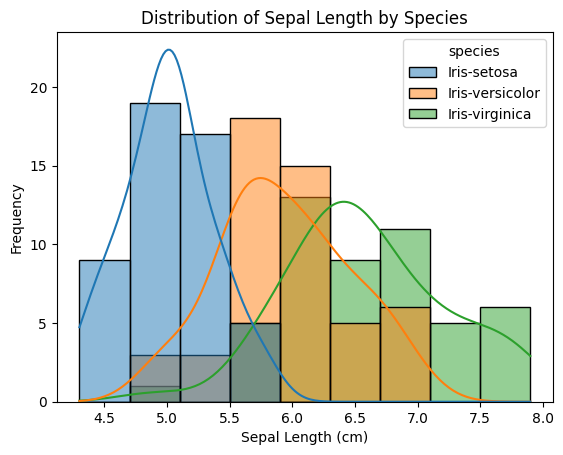

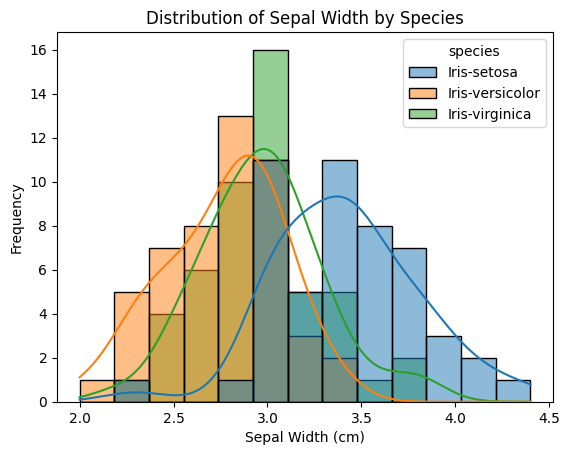

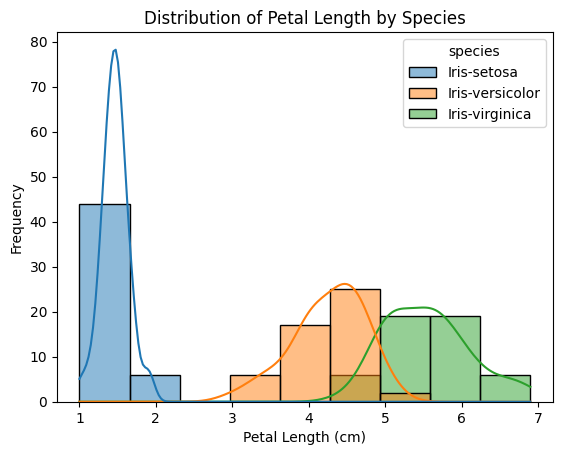

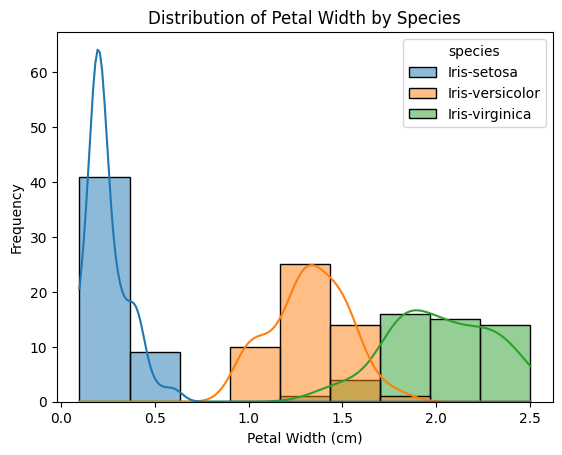

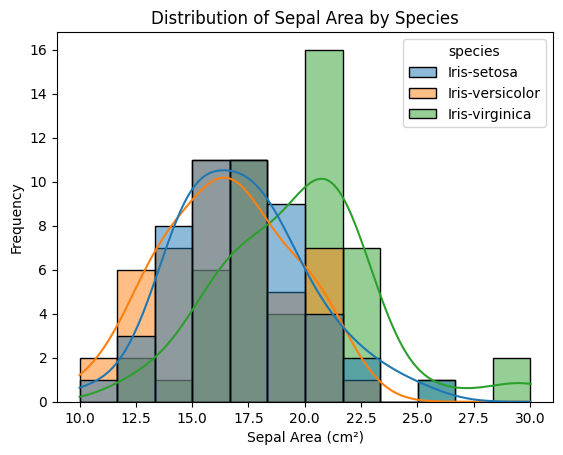

In [24]:
sns.histplot(data=iris_df, x='sepal_length_cm', hue='species', kde=True)
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=iris_df, x='sepal_width_cm', hue='species', kde=True)
plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=iris_df, x='petal_length_cm', hue='species', kde=True)
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=iris_df, x='petal_width_cm', hue='species', kde=True)
plt.title('Distribution of Petal Width by Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=iris_df, x='sepal_area', hue='species', kde=True)
plt.title('Distribution of Sepal Area by Species')
plt.xlabel('Sepal Area (cm²)')
plt.ylabel('Frequency')
plt.show()

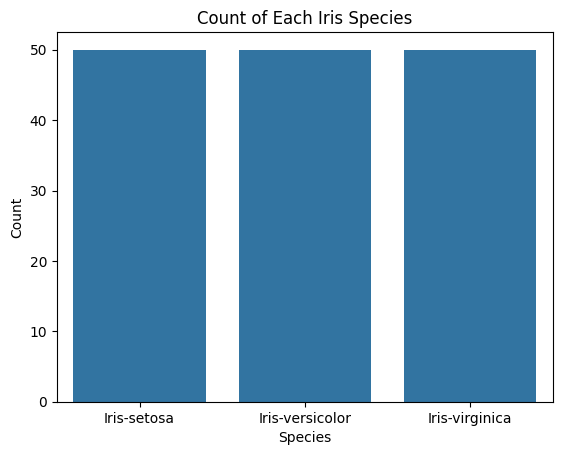

In [25]:
sns.countplot(data=iris_df, x='species')
plt.title('Count of Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

### 3.2 Bivariate Analysis
- Scatterplot: petal length vs petal width, colored by species → clear separation.
- Boxplot: sepal length by species → setosa flowers shorter on average.
- Correlation heatmap → petal length & petal width strongly correlated.

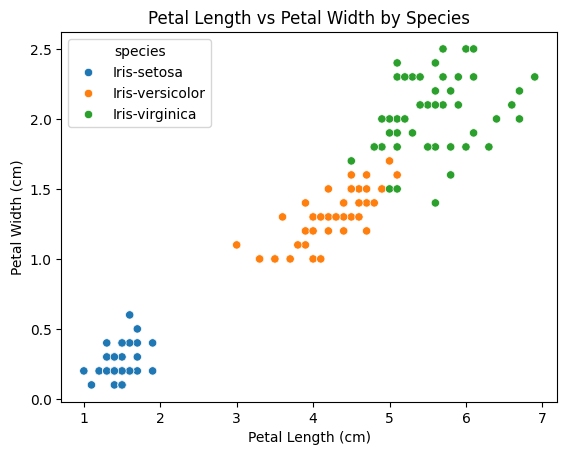

In [27]:
sns.scatterplot(data=iris_df, x='petal_length_cm', y='petal_width_cm', hue='species')
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

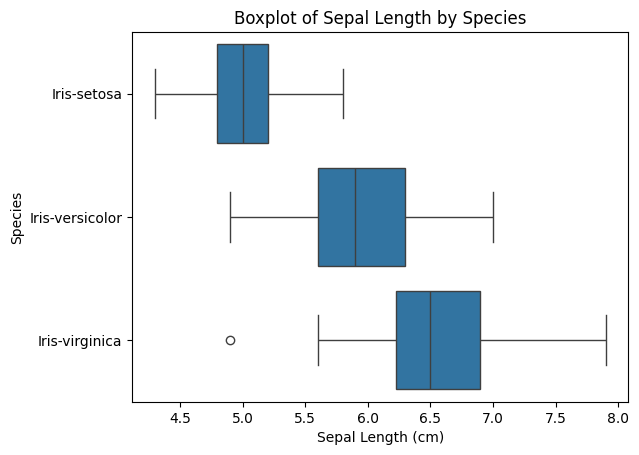

In [28]:
sns.boxplot(data=iris_df, x='sepal_length_cm', y='species')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Species')
plt.show()

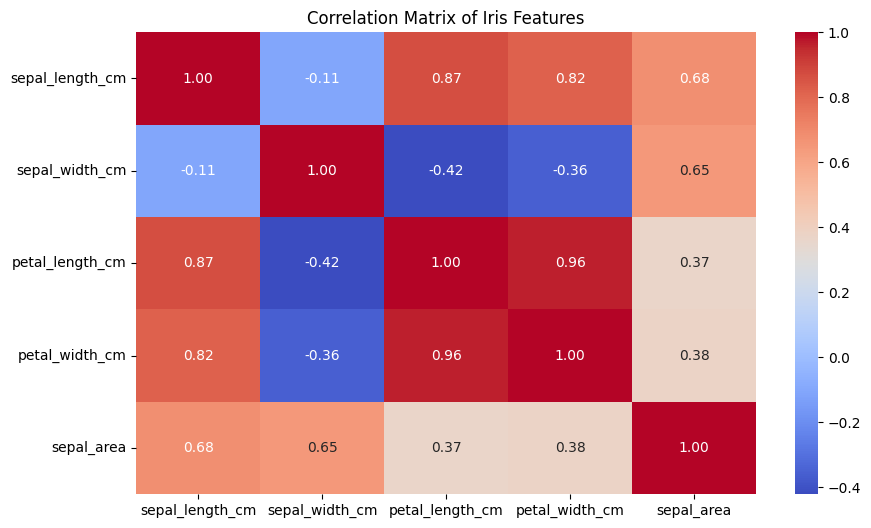

In [29]:
iris_numeric_data_matrix = iris_df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'sepal_area']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(iris_numeric_data_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()

### 3.3 Multivariate Analysis
- Pairplot of all numerical features → shows clustering by species.
- Groupby mean of all features by species → summary table.

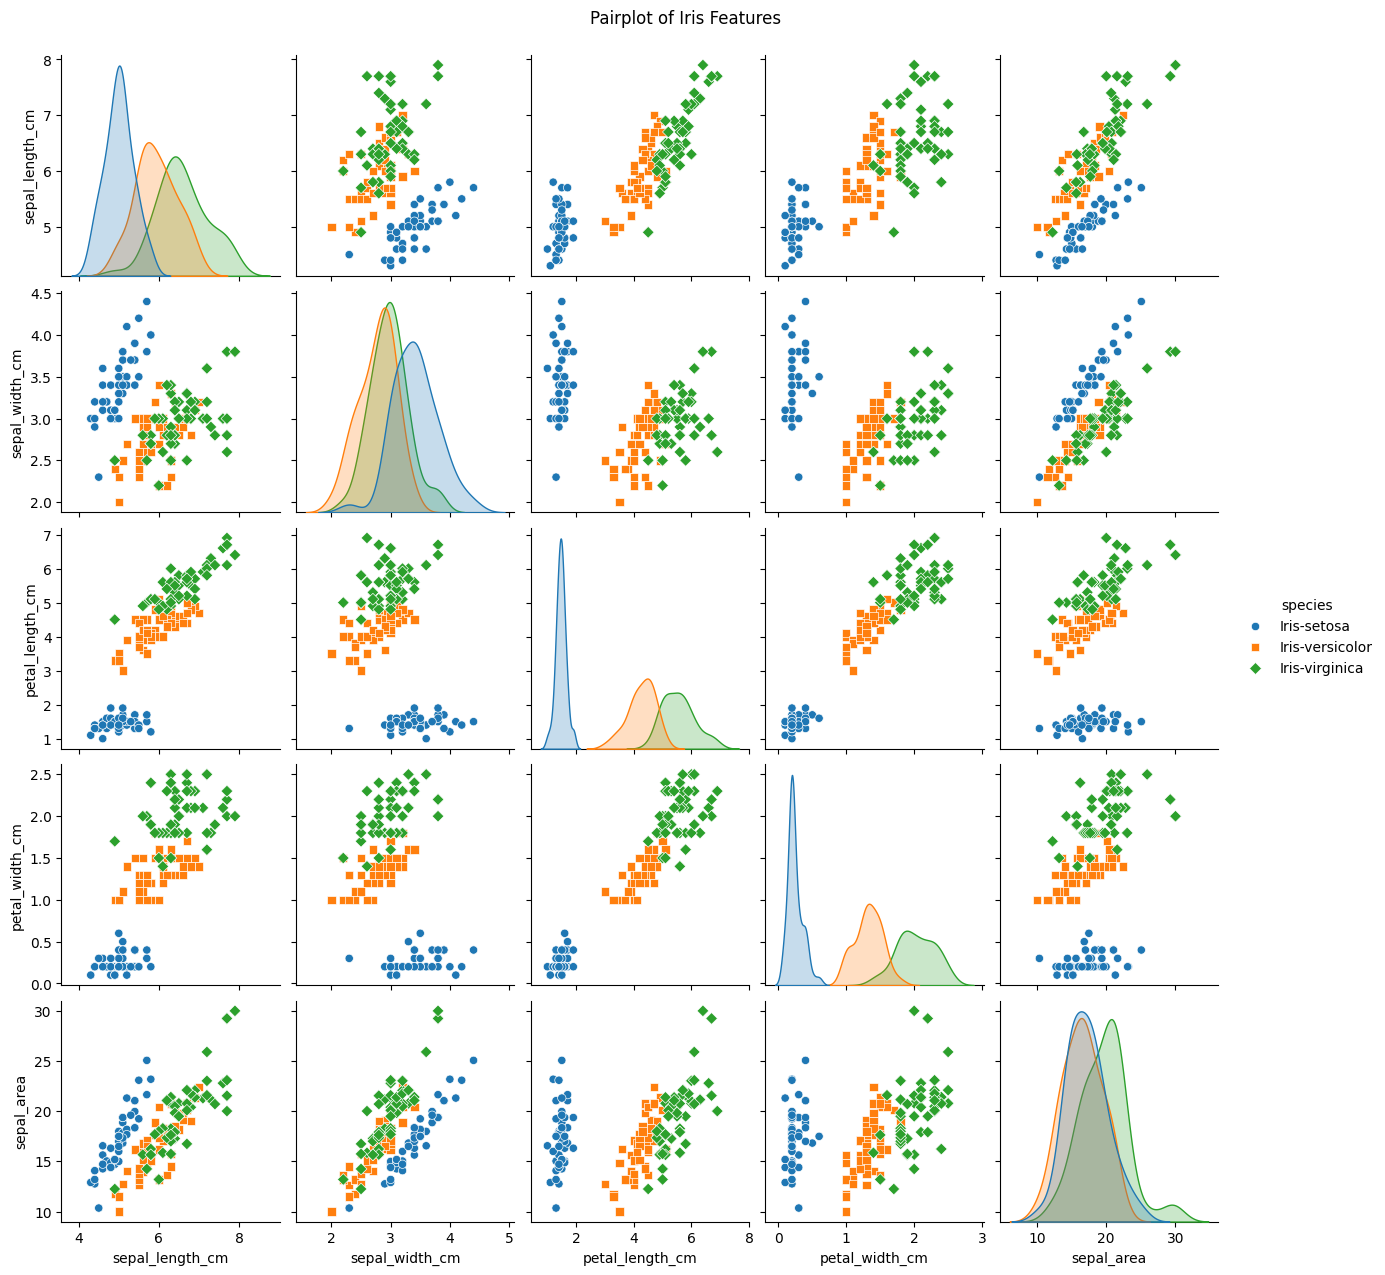

In [30]:
sns.pairplot(iris_df, hue='species', diag_kind='kde', markers=["o", "s", "D"], 
             vars=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'sepal_area'])
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()

In [31]:
iris_df.groupby('species').mean().T

species,Iris-setosa,Iris-versicolor,Iris-virginica
id,25.5000,75.5000,125.5000
sepal_length_cm,5.0060,5.9360,6.5880
sepal_width_cm,3.4180,2.7700,2.9740
petal_length_cm,1.4640,4.2600,5.5520
petal_width_cm,0.2440,1.3260,2.0260
sepal_area,17.2088,16.5262,19.6846


## 4. Insights
- Summarize **key findings**:
  1. Petal measurements are the strongest predictors: setosa is linearly separable from the other species.
  2. Sepal features overlap heavily, less useful for distinguishing species.
  3. Strong correlation between petal length and petal width → multicollinearity to consider in modeling.
  4. Dataset is balanced (50 samples per species), so no class imbalance issues.

---